## data preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:/Python/Practice5002/data_final.csv')
df.head(1)

,Unnamed: 0,Unnamed: 0.1,index,video_id,trending_date,title,channel_title,category_id,publish_time,tags,...,likes,dislikes,comment_count,description,Days_in_TopTrending,like_rate,willing_to_like,willing_to_comment,like_or_not,category
0,0,0,6280,MJO3FmmFuh4,2018-02-05 00:00:00,Budweiser - Original Whazzup? ad,dannotv,24,2006-07-23 08:24:11,"Budweiser|""Bud""|""Whazzup""|""ad""",...,459,152,82,"Original Whazzup ad - however, there is a litt...",4214,0.751227,0.002364,0.000317,0,Entertainment


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168 entries, 0 to 6167
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6168 non-null   int64  
 1   Unnamed: 0.1         6168 non-null   int64  
 2   index                6168 non-null   int64  
 3   video_id             6168 non-null   object 
 4   trending_date        6168 non-null   object 
 5   title                6168 non-null   object 
 6   channel_title        6168 non-null   object 
 7   category_id          6168 non-null   int64  
 8   publish_time         6168 non-null   object 
 9   tags                 6168 non-null   object 
 10  views                6168 non-null   int64  
 11  likes                6168 non-null   int64  
 12  dislikes             6168 non-null   int64  
 13  comment_count        6168 non-null   int64  
 14  description          6164 non-null   object 
 15  Days_in_TopTrending  6168 non-null   i

In [4]:
# delete useless column
del df['Unnamed: 0']
del df['Unnamed: 0.1']

In [5]:
df.head(1)

,index,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,Days_in_TopTrending,like_rate,willing_to_like,willing_to_comment,like_or_not,category
0,6280,MJO3FmmFuh4,2018-02-05 00:00:00,Budweiser - Original Whazzup? ad,dannotv,24,2006-07-23 08:24:11,"Budweiser|""Bud""|""Whazzup""|""ad""",258506,459,152,82,"Original Whazzup ad - however, there is a litt...",4214,0.751227,0.002364,0.000317,0,Entertainment


In [6]:
# sort ascending
df.sort_values(by='index',ascending=True,inplace=True)
df.head(1)

,index,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,Days_in_TopTrending,like_rate,willing_to_like,willing_to_comment,like_or_not,category
4612,0,zy0b9e40tK8,2017-11-14 00:00:00,Dark | Official Trailer [HD] | Netflix,Netflix,24,2017-11-09 09:00:07,"Netflix|""Baran Bo Odar""|""Jantje Friese""|""DARK""...",378750,5642,146,675,The disappearance of two kids in the German sm...,4,0.974775,0.015282,0.001782,1,Entertainment


In [7]:
df.tail(1)

,index,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,Days_in_TopTrending,like_rate,willing_to_like,willing_to_comment,like_or_not,category
1217,40378,1Aoc-cd9eYs,2018-05-14 00:00:00,Cobra Kai Ep 2 - Strike First - The Karate Kid...,Cobra Kai,24,2018-05-02 16:02:35,"Cobra Kai|""Karate Kid""|""YouTube Red Original S...",1062499,32276,4594,5547,Present day Daniel LaRusso lives a charmed lif...,11,0.8754,0.034701,0.005221,0,Entertainment


In [8]:
df.shape

(6168, 19)

In [9]:
#Calculate the comment rate
df['comment_rate'] = df['comment_count']/df['views']
df.head(1)

,index,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,Days_in_TopTrending,like_rate,willing_to_like,willing_to_comment,like_or_not,category,comment_rate
4612,0,zy0b9e40tK8,2017-11-14 00:00:00,Dark | Official Trailer [HD] | Netflix,Netflix,24,2017-11-09 09:00:07,"Netflix|""Baran Bo Odar""|""Jantje Friese""|""DARK""...",378750,5642,146,675,The disappearance of two kids in the German sm...,4,0.974775,0.015282,0.001782,1,Entertainment,0.001782


In [10]:
#Create a new data frame for correlation analysis，#Because the values of 'like_or_not' and 'willing_to_like' are caculates by 'like_rate', so I dropped this 2 columns.And the values of willing_to_comment
#and comment_rate are caculated by comment_count, so I dropped this 2 columns as well.
df_1=pd.DataFrame()
df_1['index']=df['index']
df_1['views'] = df['views']
df_1['comment_count'] = df['comment_count']
df_1['Days_in_TopTrending'] = df['Days_in_TopTrending']
df_1['category_id'] = df['category_id']
df_1['like_rate'] = df['like_rate']

In [11]:
df_1.head(2)

,index,views,comment_count,Days_in_TopTrending,category_id,like_rate
4612,0,378750,675,4,24,0.974775
4828,5,128002,266,4,24,0.884580


In [12]:
#Standardized data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_s = min_max_scaler.fit_transform(df_1)

In [13]:
df_s = pd.DataFrame(df_s)
df_s.head(1)

,0,1,2,3,4,5
0,0.0,0.001679,0.000549,0.000949,0.547619,0.974775


In [14]:
#Rename columns' names
df_s=df_s.rename(columns={0:'index',1:'views',2:'comment_count',3:'Days_in_TopTrending',4:'category_id',5:'like_rate'})

In [15]:
df_s.head(10)

,index,views,comment_count,Days_in_TopTrending,category_id,like_rate
0,0.000000,0.001679,0.000549,0.000949,0.547619,0.974775
1,0.000124,0.000566,0.000216,0.000949,0.547619,0.884580
2,0.000198,0.000516,0.000168,0.000475,0.547619,0.978723
3,0.000248,0.007884,0.001975,0.000237,0.547619,0.944254
4,0.000297,0.002157,0.000518,0.000475,0.547619,0.975990
5,0.000322,0.000047,0.000113,0.000000,0.547619,0.777151
6,0.000347,0.001737,0.000483,0.000237,0.547619,0.988635
7,0.000396,0.001834,0.000477,0.000237,0.547619,0.984042
8,0.000446,0.001924,0.000589,0.000237,0.547619,0.980417
9,0.000471,0.001059,0.000806,0.000000,0.547619,0.960241


In [16]:
df_s.shape

(6168, 6)

In [17]:
df_s.to_csv('C:/Python/Practice5002/df_s.csv')

## Correlation analysis

### There are lower correlation coefficients(below 0.7) between like_rate and other factors.

In [18]:
#related analysis by using df_s
df_s.corr()

,index,views,comment_count,Days_in_TopTrending,category_id,like_rate
index,1.000000,-0.063483,-0.036885,0.015932,-0.082158,-0.134858
views,-0.063483,1.000000,0.633145,-0.018552,-0.151414,0.015920
comment_count,-0.036885,0.633145,1.000000,-0.016519,-0.071776,0.016444
Days_in_TopTrending,0.015932,-0.018552,-0.016519,1.000000,-0.045248,-0.010541
category_id,-0.082158,-0.151414,-0.071776,-0.045248,1.000000,-0.062143
like_rate,-0.134858,0.015920,0.016444,-0.010541,-0.062143,1.000000


In [19]:
df_corr = pd.DataFrame()
df_corr = df_s.corr()

In [20]:
df_corr.to_csv('C:/Python/Practice5002/df_corr.csv')

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

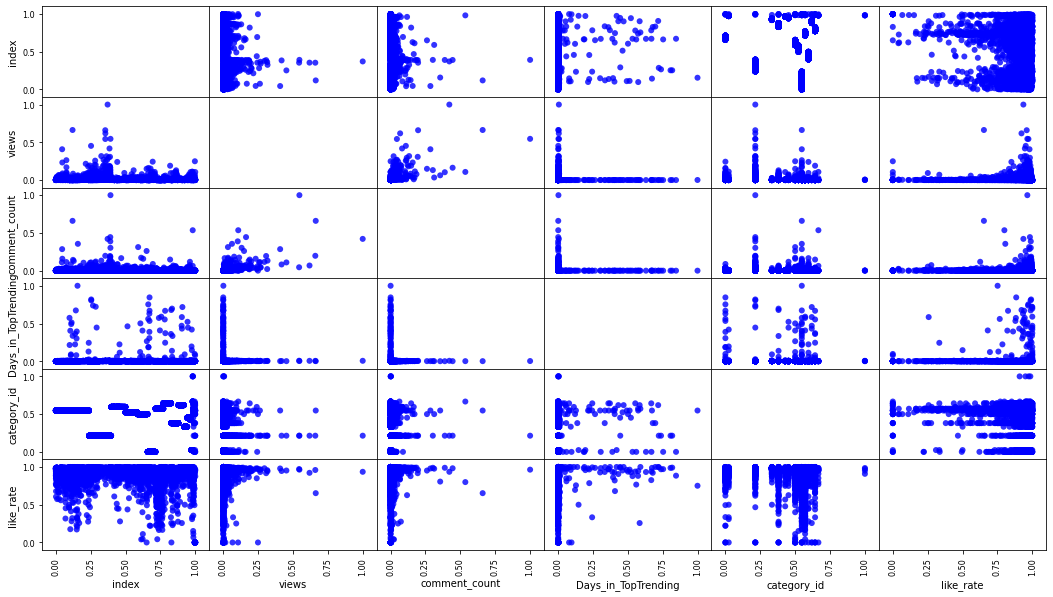

In [22]:
pd.plotting.scatter_matrix(df_s,figsize=(18,10),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  
plt.show()

In [23]:
df_s.corr()['like_rate']

index                 -0.134858
views                  0.015920
comment_count          0.016444
Days_in_TopTrending   -0.010541
category_id           -0.062143
like_rate              1.000000
Name: like_rate, dtype: float64

(6.5, -0.5)

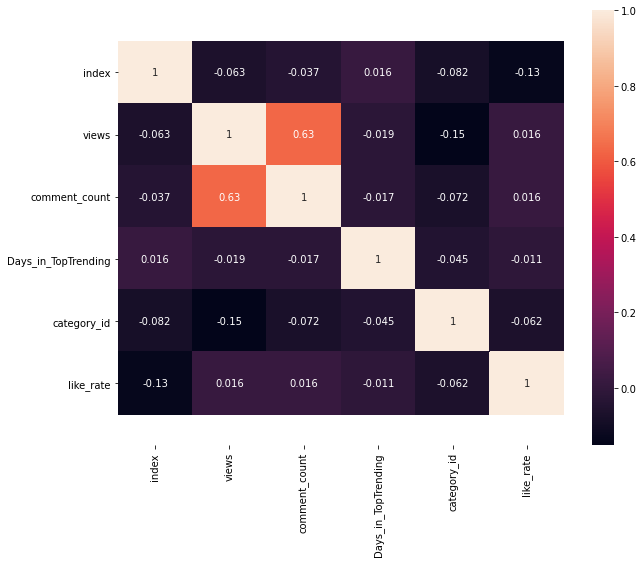

In [26]:
import seaborn as sns
plt.figure(figsize=(10,8))
ax = sns.heatmap(df_s.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Multiple linear regression

### We choose comment_count and category as variable to predict like_rate.The r-square is 0.854 which is near to 1, and p-value is below 0.5, so model_1 is good.

#### split data and set up model

In [24]:
#Split the data set
from sklearn.model_selection import train_test_split

In [25]:
X= df_s.iloc[:,[1,2,3,4]]

In [26]:
X.shape

(6168, 4)

In [27]:
y= df_s.iloc[:,5]

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [29]:
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
X_new.shape

(6168, 2)

In [30]:
X_new

array([[5.49381234e-04, 5.47619048e-01],
       [2.16496901e-04, 5.47619048e-01],
       [1.68476912e-04, 5.47619048e-01],
       ...,
       [2.71190855e-03, 5.47619048e-01],
       [1.99649210e-03, 0.00000000e+00],
       [4.51469290e-03, 5.47619048e-01]])

In [31]:
X_new = pd.DataFrame(X_new)
X_new.head()

,0,1
0,0.000549,0.547619
1,0.000216,0.547619
2,0.000168,0.547619
3,0.001975,0.547619
4,0.000518,0.547619


In [32]:
X_new=X_new.rename(columns={0:'comment_count',1:'category_id'})

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [34]:
#Multiple linear regression
import statsmodels.api as sm

In [35]:
model_1 = sm.OLS(y_train,X_train).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              like_rate   R-squared (uncentered):                   0.854
Model:                            OLS   Adj. R-squared (uncentered):              0.854
Method:                 Least Squares   F-statistic:                          1.263e+04
Date:                Thu, 09 Sep 2021   Prob (F-statistic):                        0.00
Time:                        21:09:42   Log-Likelihood:                         -1661.0
No. Observations:                4317   AIC:                                      3326.
Df Residuals:                    4315   BIC:                                      3339.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
comment_count     1.7969      0.199      9.011      0.000       1.406       2.188
category_id       1.7307      0.011    155.245      0.000       1.709       1.753
==============================================================================
Omnibus:                      337.405   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.621
Skew:                           0.647   Prob(JB):                    8.66e-104
Kurtosis:                       3.981   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
train_predict1 = model_1.predict(X_train)

In [37]:
from sklearn import metrics
import math
math.sqrt(metrics.mean_squared_error(train_predict1,y_train))

0.3555184423041059

In [38]:
#predict based on test dataset
test_predict1 = model_1.predict(X_test)
math.sqrt(metrics.mean_squared_error(test_predict1,y_test))

0.3411428297509185

In [39]:
#check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, X.columns.get_loc(i)) for i in X.columns]
vif

[1.7672641918256022, 1.746979866914441, 1.0103868917916572, 1.0558632930653404]

#### Evaluation model:Diagnostic Plots(Model_1)

In [40]:
# model values
model_fitted_y = model_1.fittedvalues
# model residuals
model_residuals = model_1.resid

In [41]:
# normalized residuals
model_norm_residuals = model_1.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

In [42]:
# absolute residuals
model_abs_resid = np.abs(model_residuals)

In [43]:
# leverage, from statsmodels internal
model_leverage = model_1.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_1.get_influence().cooks_distance[0]

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

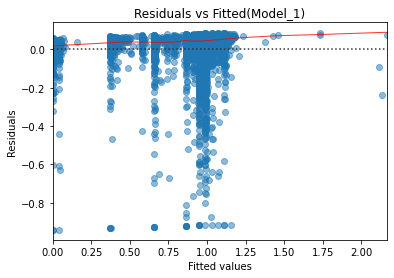

In [45]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(train_predict1,y_train, data=X_train,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted(Model_1)')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

In [46]:
from statsmodels.graphics.gofplots import ProbPlot

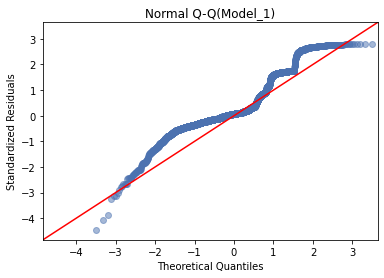

In [47]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q(Model_1)')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

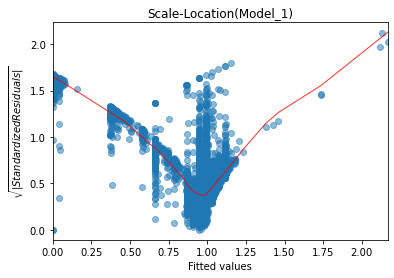

In [48]:
# plot scale and location
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location(Model_1)')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

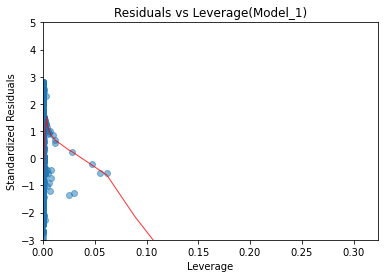

In [49]:
# plot Residuals vs Leverage
plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage(Model_1)')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

## Multinomial nonlinear regression model

### We choose comment_count and category as variable to predict like_rate by using multinomial nonlinear regression model.But r-square is 0.006, so this model_2 is not so good.

In [50]:
#Multinomial nonlinear regression model
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [51]:
poly_reg = PolynomialFeatures(degree=2)

In [52]:
Xtrain_2 = poly_reg.fit_transform(X_train)

In [53]:
Xtrain_2

array([[1.00000000e+00, 3.36953823e-04, 5.00000000e-01, 1.13537879e-07,
        1.68476912e-04, 2.50000000e-01],
       [1.00000000e+00, 2.42118414e-02, 5.47619048e-01, 5.86213264e-04,
        1.32588655e-02, 2.99886621e-01],
       [1.00000000e+00, 1.33886241e-03, 2.14285714e-01, 1.79255257e-06,
        2.86899089e-04, 4.59183673e-02],
       ...,
       [1.00000000e+00, 9.25402167e-04, 3.80952381e-01, 8.56369171e-07,
        3.52534159e-04, 1.45124717e-01],
       [1.00000000e+00, 1.14434076e-03, 3.80952381e-01, 1.30951578e-06,
        4.35939338e-04, 1.45124717e-01],
       [1.00000000e+00, 8.13898124e-07, 5.47619048e-01, 6.62430157e-13,
        4.45706116e-07, 2.99886621e-01]])

In [54]:
Xtrain_2.shape

(4317, 6)

In [55]:
model_2=linear_model.LinearRegression()
results_2=model_2.fit(Xtrain_2,y_train)
results_2

LinearRegression()

In [56]:
params=results_2.get_params()
params

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [57]:
results_2.coef_

array([ 0.        ,  0.63460245,  0.04378954, -0.50641092, -0.88073476,
       -0.11578143])

In [58]:
results_2.intercept_

0.9281546645001658

In [59]:
#R-square
results_2.score(Xtrain_2,y_train)

0.005901624021868779

In [61]:
train_predict2 = model_2.predict(Xtrain_2)
train_predict2.shape

(4317,)

In [62]:
math.sqrt(metrics.mean_squared_error(train_predict2,y_train))

0.13158899351032102

In [63]:
#predict based on test dataset
Xtest_2 = poly_reg.fit_transform(X_test)
test_predict2 = model_2.predict(Xtest_2)

In [64]:
test_predict2.shape

(1851,)

In [65]:
math.sqrt(metrics.mean_squared_error(test_predict2,y_test))

0.11836256090166829

#### Evaluation model

In [66]:
import yellowbrick
from yellowbrick.regressor import ResidualsPlot

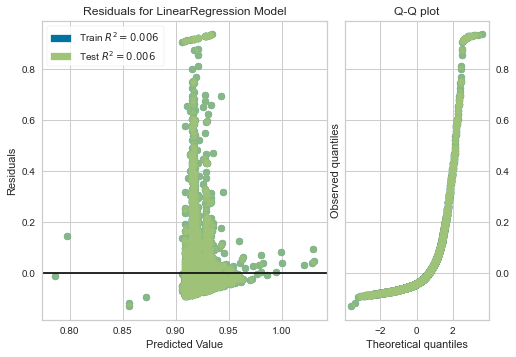

In [67]:
visualizer = ResidualsPlot(results_2, hist=False, qqplot=True)
visualizer.fit(Xtrain_2, y_train)
visualizer.score(Xtrain_2, y_train)
visualizer.show()

## Curvilinear regression model

### As the results of model_1 and model_2 are not idea, so we intend to try curvilinear regression model to predict.

#### how to choose variable and function

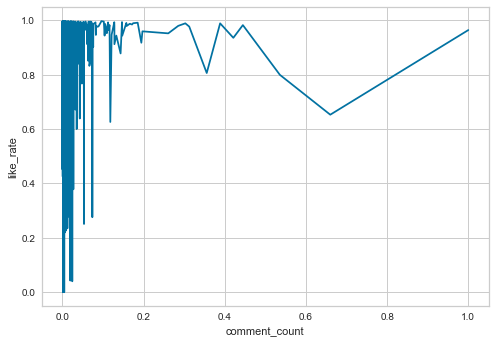

In [68]:
# Check curve style,at last we decide to use comment_count as variable to predict like_rate based on Logarithmic function.
sns.lineplot(x=df_s['comment_count'],y=df_s['like_rate'])

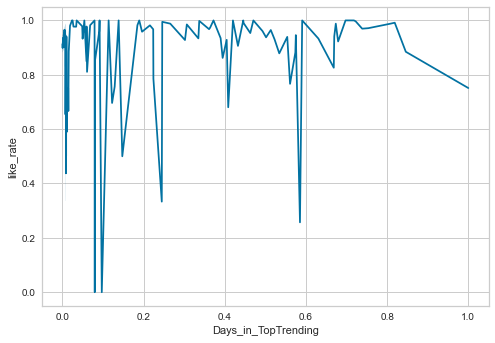

In [69]:
sns.lineplot(x=df_s['Days_in_TopTrending'],y=df_s['like_rate'])

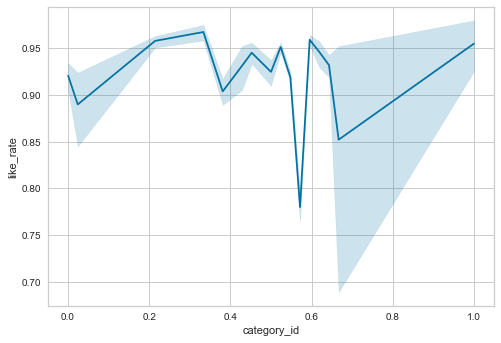

In [70]:
sns.lineplot(x=df_s['category_id'],y=df_s['like_rate'])

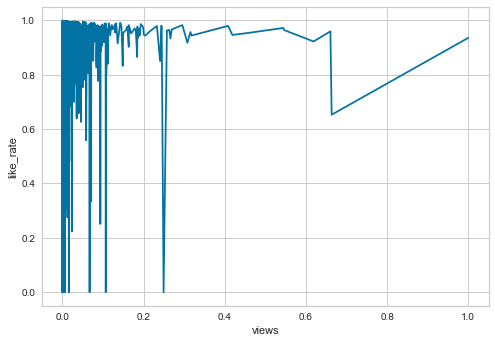

In [71]:
sns.lineplot(x=df_s['views'],y=df_s['like_rate'])

#### Set up model_3 by using log function

In [72]:
from scipy.optimize import curve_fit

In [73]:
def func(x,a,b):
    return a*np.log(x)+b

In [74]:
popt,pcov = curve_fit(func,X_train['comment_count']+1,y_train)
a,b = popt
popt

array([0.10510946, 0.92093772])

In [75]:
train_predict3 = func(X_train['comment_count']+1,a,b)

In [76]:
train_predict3 = pd.DataFrame(train_predict3)

In [80]:
train_predict3 = train_predict3.rename(columns={'comment_count':'like_rate'})
train_predict3

,like_rate
3454,0.920973
1467,0.923452
2117,0.921078
195,0.920994
5666,0.921063
...,...
3772,0.920989
5191,0.920950
5226,0.921035
5390,0.921058


In [81]:
math.sqrt(metrics.mean_squared_error(train_predict3,y_train))

0.13195904727252258

In [82]:
test_predict3 = func(X_test['comment_count']+1,a,b)
math.sqrt(metrics.mean_squared_error(test_predict3,y_test))

0.11886239457571958

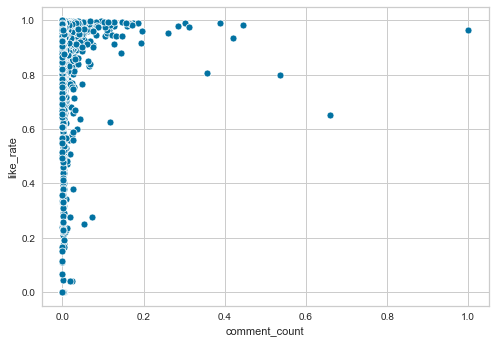

In [91]:
sns.scatterplot(x=df_s['comment_count'],y=df_s['like_rate'])

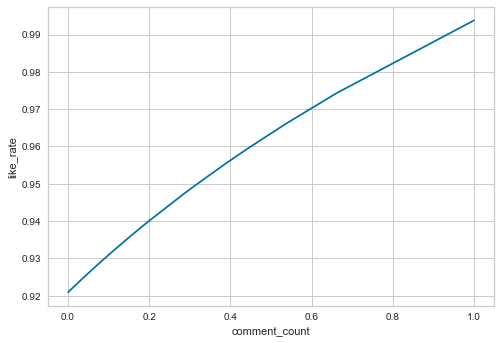

In [90]:
sns.lineplot(x=X_train['comment_count'],y=train_predict3['like_rate'])

# Results:
1、Multiple linear regression is better than multinomial nonlinear regression and curve regresssion(log function).
2、R-square of multiple linear regression is about 0.854,which means this model is good.
3、Multi-collinearity of multiple linear regression is not significant.
4、RMSE of multiple linear regression is about 0.355.
5、Although RMSE of multinomial nonlinear regression model is 0.131, R-square of multinomial nonlinear regression model is 0.059 which means that the model is bad.